<a href="https://colab.research.google.com/github/yustinaivanova/math_netology/blob/master/dz_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание 3. Математика для data sciense. Нетология.

Решить систему линейных уравнений:

![alt text](https://italiandirectory.eu/wp-content/ql-cache/quicklatex.com-34a5602e13176cbddcfd35cca34478fe_l3.svg)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA

In [9]:
a = np.array([[2, 1 , 1], [1, 3, 0], [1, 2, 0]])
b = np.array([4, 5, 6])

c = np.linalg.solve(a, b)
print(c[0])
print(c[1])
print(c[2])

8.0
-1.0
-11.0


In [10]:
np.allclose(np.dot(a, x), b)

True

Анна выбирает тарифный план для телефонной связи. Первый план, T1, стоит 20 долларов в месяц, каждый звонок стоит 25 центов в минуту. Второй тарифный план, T2, стоит 40долларов в месяц, но звонки стоят 8 центов в минуту. Какой план ей выбрать, если Анна звонит не более 117 минут в месяц?

Составим задачу в системе линейных уравнений. 

Количество минут - независимая переменная, будет нашим x. Стоимость тарифа - зависимая величина, будет нашим y. 

Написать систему уравнений для данной задачи, построить график, найти точку пересечения прямых. 
Сделать вывод о том, какой тариф использовать лучше для Анны.

Система уравнений :
$$\left\{\begin{matrix}
y =  0.25x + 20\\ 
y =  0.08x + 40
\end{matrix}\right.$$

преобразуем:
$$\left\{\begin{matrix}
0.25x - y   = - 20\\ 
0.08x - y  = - 40
\end{matrix}\right.$$

In [17]:
A = np.array([[0.25, -1], [0.08, -1]])
b = np.array([[-20], [-40]])
A_inv = np.linalg.inv(A)
A_inv

array([[ 5.88235294, -5.88235294],
       [ 0.47058824, -1.47058824]])

In [19]:
x = A_inv.dot(b)
x

array([[117.64705882],
       [ 49.41176471]])

Одинаковые траты на тариф будут происходить при разговорах на 117 минут

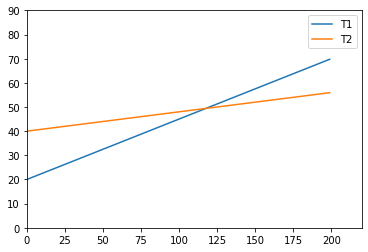

In [25]:
# посмотрим графически
x = np.arange(0, 200)
y1 = 20 + 0.25 * x
y2 = 40 + 0.08 * x

plt.figure()
plt.plot(x, y1)
plt.plot(x, y2)
plt.xlim(0, 220)
plt.ylim(0, 90)
plt.legend(['Т1','Т2'])
plt.show()
plt.close()

Как видим из графика, так как Аня говорит <= 117 минут - то для нее более предпочтитетелен первый тарифный план

Загрузить датасет Boston houses. 
Выбрать 3-хмерное пространство (3 атрибута из таблицы), взять 3 дома по данному трехмерному пространству, доказать, что данные векторы не компланарны.

In [32]:
boston = load_boston()
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)
df_boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
df_boston = df_boston[["DIS", "AGE", "RAD"]]
x = np.array(df_boston.iloc[0])
y = np.array(df_boston.iloc[1])
z = np.array(df_boston.iloc[2])

x,y,z

(array([ 4.09, 65.2 ,  1.  ]),
 array([ 4.9671, 78.9   ,  2.    ]),
 array([ 4.9671, 61.1   ,  2.    ]))

In [37]:
l = np.vstack((x, y, z)).transpose()
l

array([[ 4.09  ,  4.9671,  4.9671],
       [65.2   , 78.9   , 61.1   ],
       [ 1.    ,  2.    ,  2.    ]])

In [38]:

np.linalg.det(l)

57.18962

Так как детерминант не равняется 0 => векторы не компланарны

Для матрицы, полученной на предыдущей задачи, посчитать собственный вектор(v). Умножить собственный вектор на матрицу (Av). Сделать график. Во сколько раз Av отличается от v?

In [66]:
e_vals, e_vecs = np.linalg.eig(l)
e_vecs = e_vecs 
print('Исходная матрица: \n', l)

print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Исходная матрица: 
 [[ 4.09    4.9671  4.9671]
 [65.2    78.9    61.1   ]
 [ 1.      2.      2.    ]]
Собственные вектора: 
 [[-0.06312875+0.j         -0.49867365+0.3068076j  -0.49867365-0.3068076j ]
 [-0.99769382+0.j          0.66880327+0.j          0.66880327-0.j        ]
 [-0.02493581+0.j         -0.3291128 -0.31871718j -0.3291128 +0.31871718j]]
Собственные значения:  [84.5526084+0.j          0.2186958+0.79281226j  0.2186958-0.79281226j]


In [70]:
Av = np.dot(l, e_vecs[:, 0])  
Av

array([ -5.33770025+0.j, -84.3576152 +0.j,  -2.10838802+0.j])

//anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


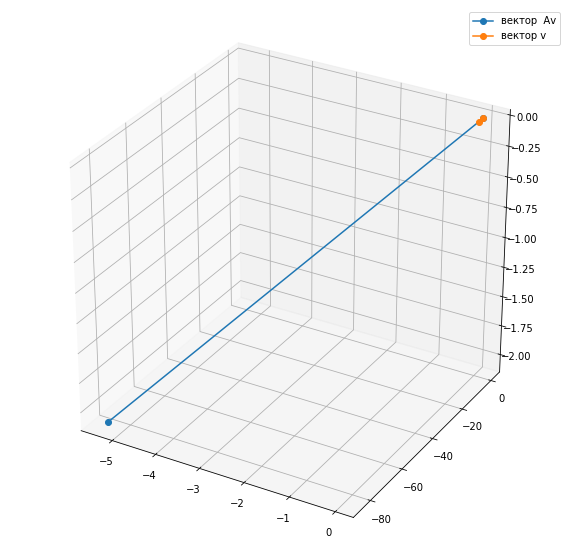

In [71]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')

ax.plot([0, Av[0]], [0, Av[1]], [0, Av[2]], '-o')
ax.plot([0, e_vecs[0][0]], [0, e_vecs[1][0]], [0, e_vecs[2][0]], '-o')
ax.legend(['вектор  Av', 'вектор v'])

In [72]:
e_vals[0]

(84.55260839769024+0j)

Av отичается от v в 84.5 раза

Задание повышенного уровня.

Как посчитать интеграл полинома, полученного в домашнем задании №2, при полиномиальной регрессии?

In [51]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import pandas as pd

boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
price = boston_dataset.target
  
x = boston.LSTAT

x = np.array(x).reshape(-1, 1)
y = price

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(x) 
  
poly.fit(X_poly, y) 
lin2 = LinearRegression()
model = lin2.fit(X_poly, y)

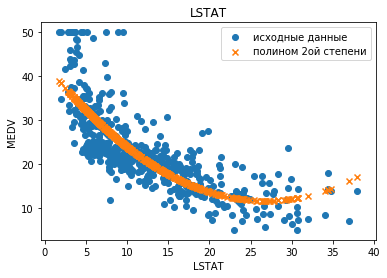

In [52]:
y_pred = model.predict(poly.fit_transform(x))
plt.scatter(x, y, marker='o')
plt.scatter(x, y_pred, marker='x')
plt.title('LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(['исходные данные', 'полином 2ой степени'])
plt.show()

In [61]:
# берем мин и макс значение по абсцисс чтобы выбрать промежуток где мы будем считать интеграл
a, b = min(x), max(x)

#составляем фунцкцию полинома
def fx(x):
    x_ = poly.transform(np.array(x).reshape(-1, 1))
    return model.predict(x_)[0]

#считаем интеграл
print(spint.quad(fx,a,b))

(669.7131464908402, 7.435309551282913e-12)
